In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm

from src.Question_A_funcs import simulation_dla

save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)

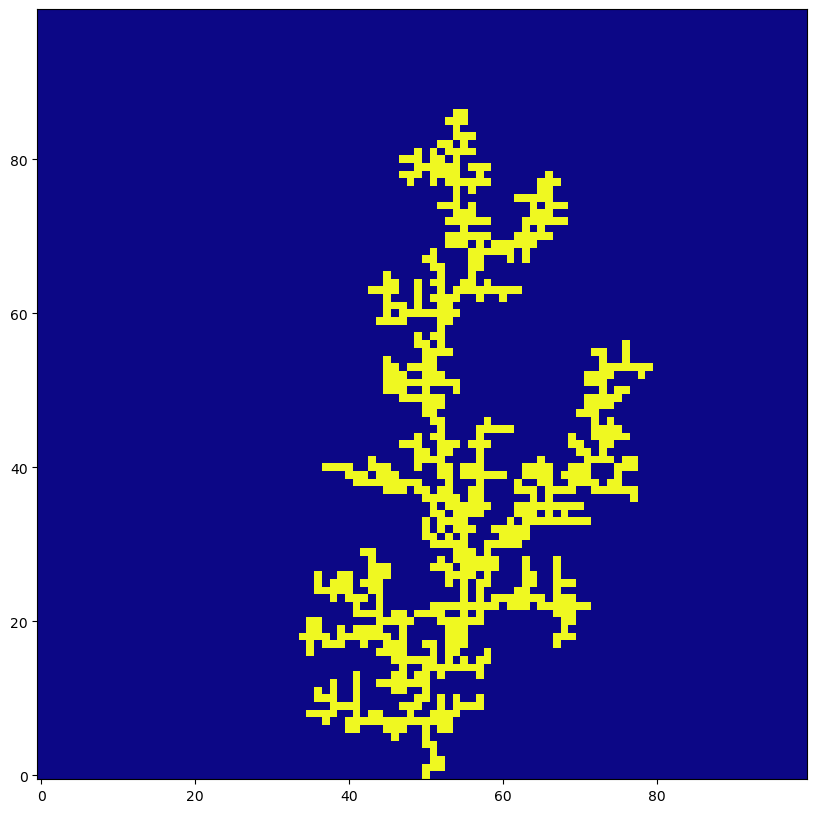

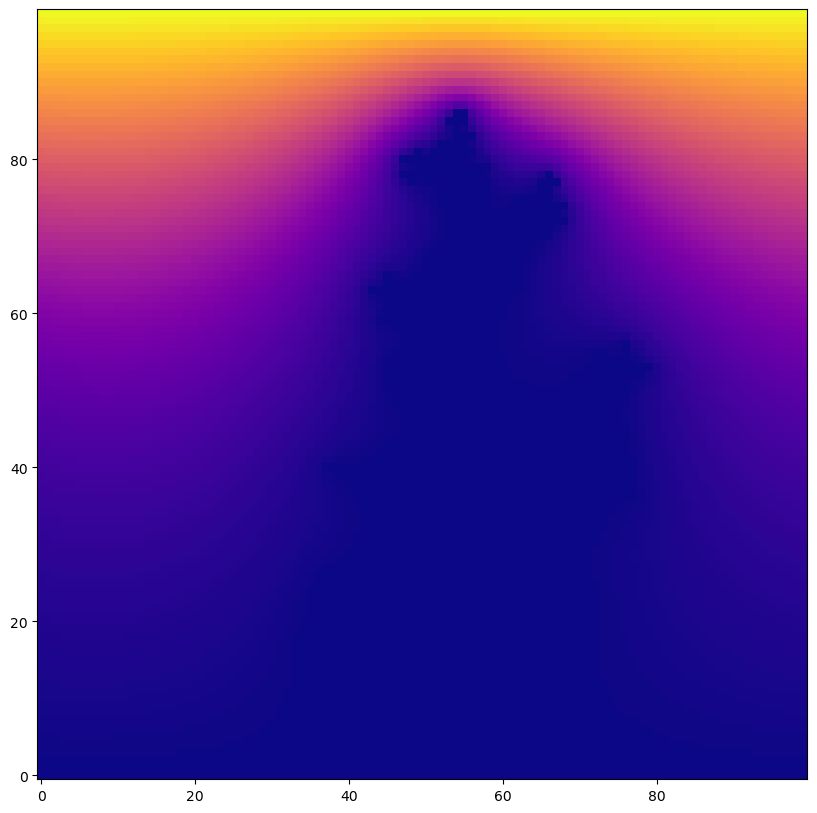

In [2]:
# Plotting of one claster with its concentration map

c, cluster, avg_iter = simulation_dla(grid_size=(100, 100), steps=800, eta=1, w=1.65)

plt.figure(figsize=(10, 10))   
plt.imshow(cluster, origin='lower', cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))   
plt.imshow(c, origin='lower', cmap='plasma')
plt.show()

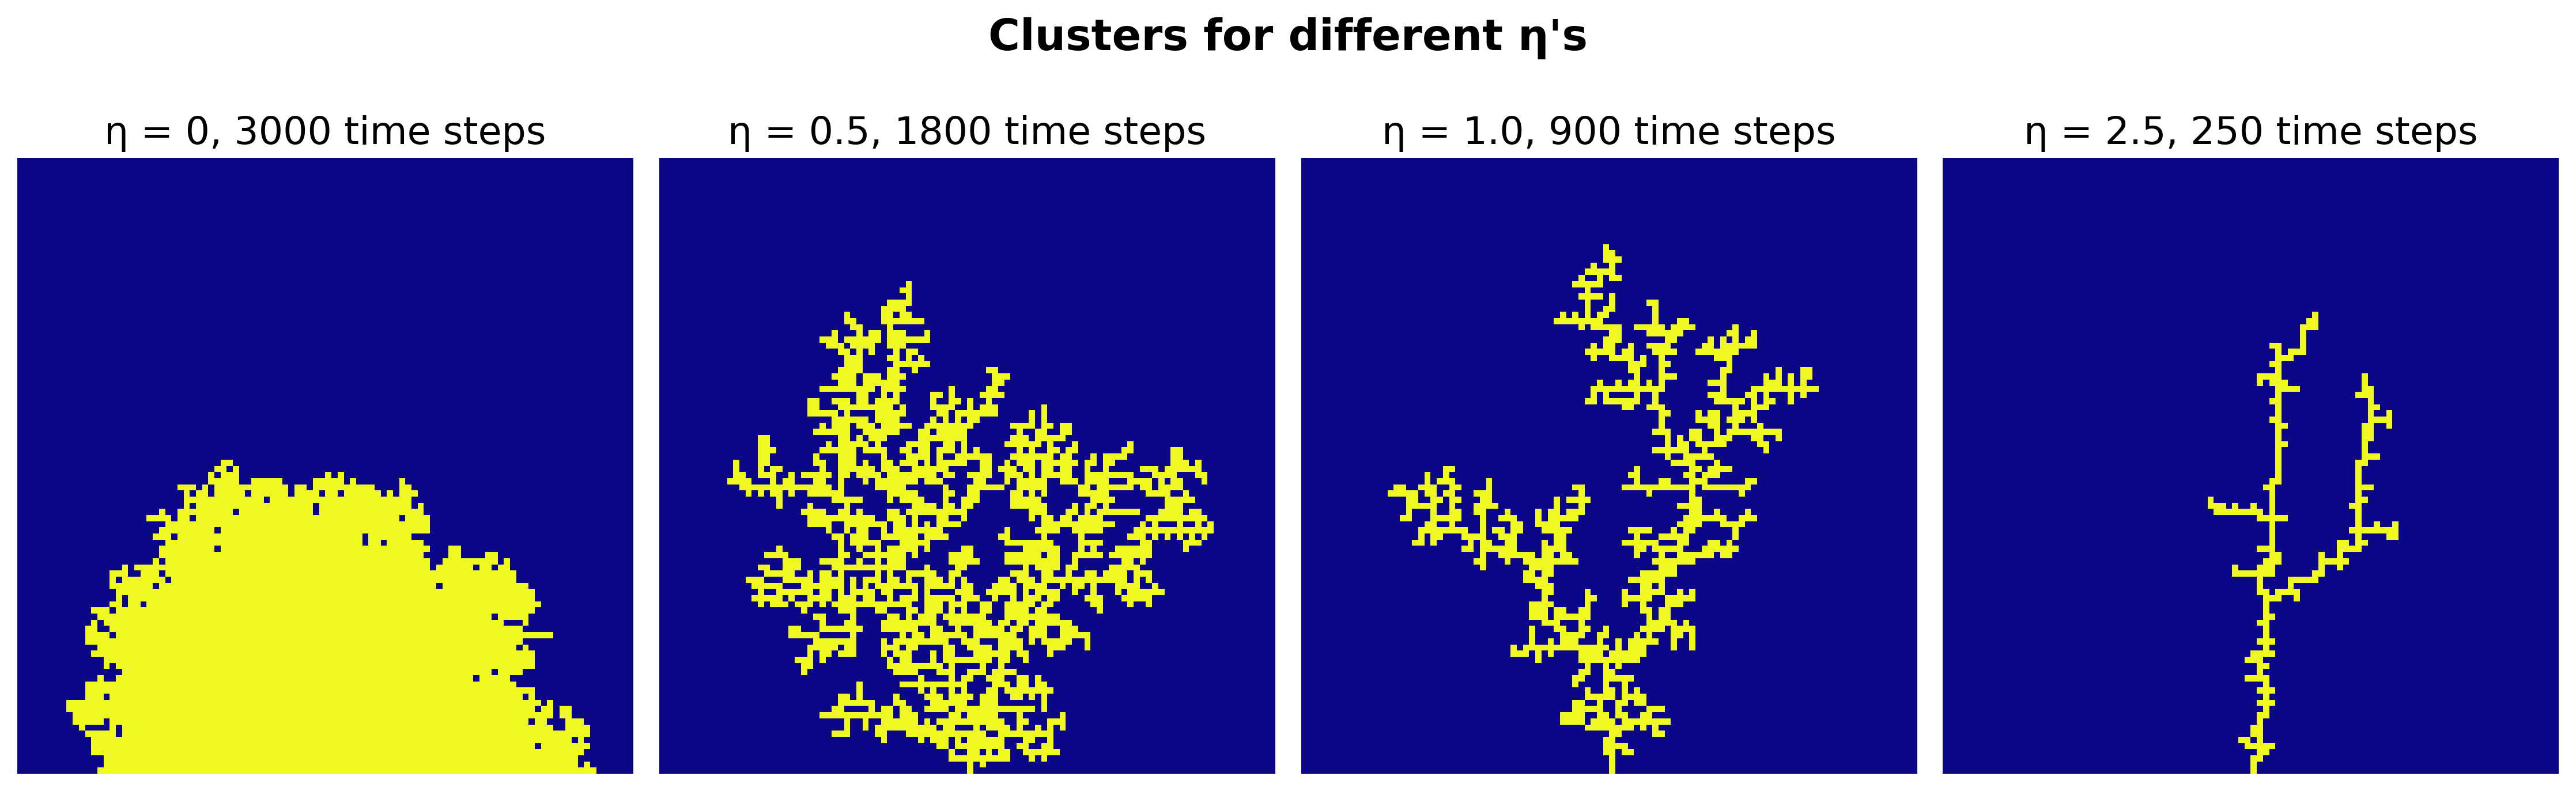

In [3]:
# Investigate the effect of η on the cluster growth

fig, axes = plt.subplots(1, 4, figsize=(15, 5), dpi=300) # Initialize figure

etas = [0, 0.5, 1.0, 2.5] # Different η's
steps_list = [3000, 1800, 900, 250] # Different number of time steps to obtain similar cluster radious

for ind, eta in enumerate(etas): # Loop over different η's and plot the obtained clusters
    c, cluster, avg_iter = simulation_dla(grid_size=(100, 100), steps=steps_list[ind], eta=eta, w=1.65)
    axes[ind].imshow(cluster, origin='lower', cmap='plasma')
    axes[ind].set_title(f'η = {eta}, {steps_list[ind]} time steps', fontsize=16)
    axes[ind].axis('off')

fig.suptitle("Clusters for different η's", fontsize=18, fontweight='semibold') # General title
plt.tight_layout()

# Save the figure
save_path = os.path.join(save_folder, f'Question A.png')
plt.savefig(save_path, dpi=300)
plt.show()

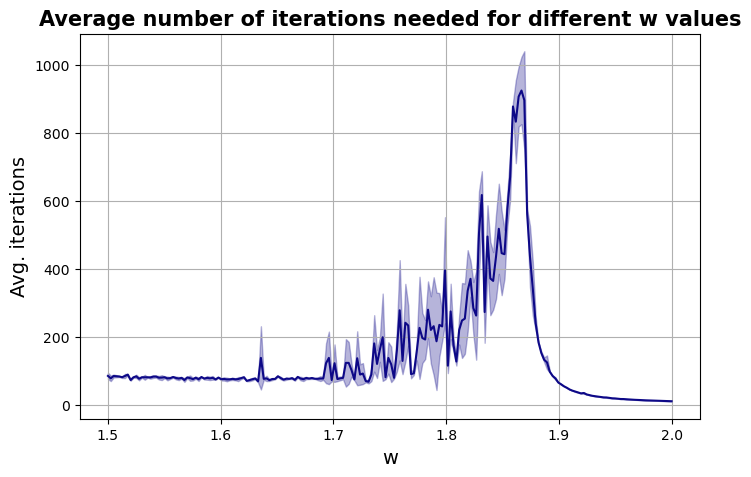

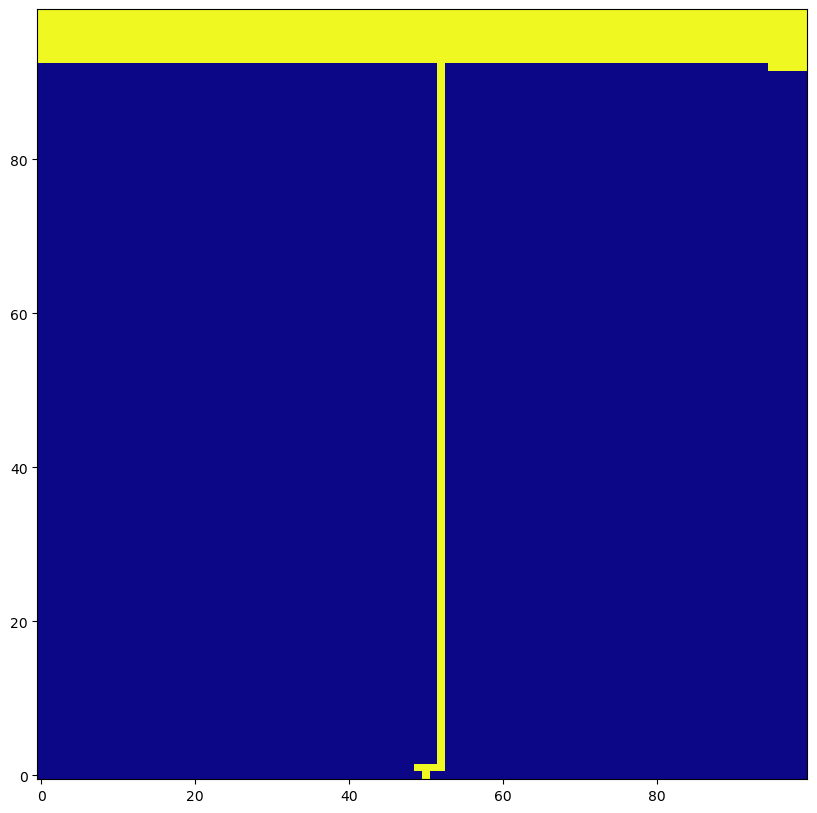

In [4]:
# Investigate the effect of w on the time needed to grow the cluster

w_list = np.linspace(1.5, 2.0, 200) # Different w values
iters = []

for index, w in enumerate(w_list): # Loop over different w values
    iters.append([])
    for _ in range(3): # Repeat the simulation 5 times to get the average time
        c, cluster, avg_iter = simulation_dla(grid_size=(100, 100), steps=500, eta=1, w=w)
        iters[index].append(avg_iter) # Save the time needed

# Calculate the mean and standard deviation of the number of iter. needed for each w
mean_iters = np.mean(iters, axis=1)
std_iters = np.std(iters, axis=1)

# Plot the results
cmap = plt.colormaps["plasma"]
line_color = cmap(0)
plt.figure(figsize=(8, 5))
plt.plot(w_list, mean_iters, label='Avg. Iterations', color=line_color)
plt.fill_between(w_list, mean_iters - std_iters, mean_iters + std_iters, color=line_color, alpha=0.3, label='Confidence Interval')
plt.xlabel('w', fontsize=14)
plt.ylabel('Avg. iterations', fontsize=14)
plt.title('Average number of iterations needed for different w values', fontsize=15, fontweight='semibold')
plt.grid()
save_path = os.path.join(save_folder, f'Question A - w.png')
plt.savefig(save_path, dpi=300)
plt.show()

# Show the (anomalous) resulting cluster for high w
c, cluster, avg_iter = simulation_dla(grid_size=(100, 100), steps=800, eta=1, w=2)
plt.figure(figsize=(10, 10))   
plt.imshow(cluster, origin='lower', cmap='plasma')
plt.show()
